In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score,accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
zero_not_accepted=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"]

for col in zero_not_accepted:
    df[col] = df[col].replace(0, np.NaN)
    mean = df[col].mean(skipna=True)
    df[col] = df[col].fillna(mean)

In [6]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [41]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [42]:
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [43]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

In [44]:
y_pred = knn.predict(X_test)

In [45]:
cf_matrix=confusion_matrix(Y_test,y_pred)

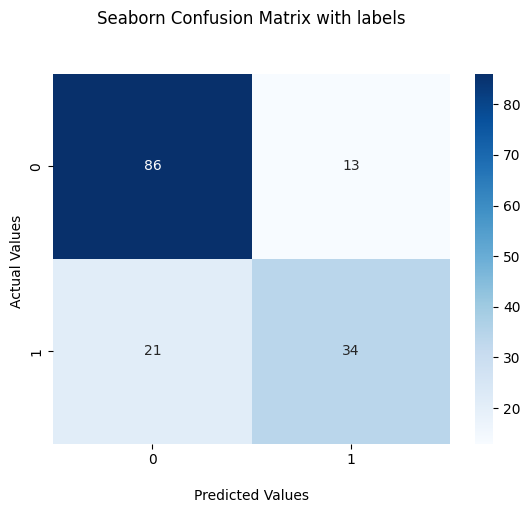

In [46]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')


## Display the visualization of the Confusion Matrix.
plt.show()

In [47]:
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred ).ravel()

In [48]:
tn, fp, fn, tp

(86, 13, 21, 34)

In [49]:
accuracy_score(Y_test,y_pred) *100

77.92207792207793

In [51]:
#The precision is the ratio of tp/(tp + fp)
precision_score(Y_test,y_pred)

0.723404255319149

In [52]:
recall_score(Y_test,y_pred)

0.6181818181818182

In [53]:
error_rate=1-accuracy_score(Y_test,y_pred)
error_rate

0.22077922077922074